In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("titles.csv")
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [11]:
data.shape

(5806, 15)

In [12]:
data.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [19]:
def data_columns_rename(_data, _new_columns_names):
    for i in range (0, len(_new_columns_names)):
        _data = _data.rename(columns = {_data.columns[i] : _new_columns_names[i]})
    return _data

data = data_columns_rename(data, ["ID", "Title", "Type", "Description", "Release Year", "Age", "Length", "Genres",
                                 "Countries", "Seasons", "IMDB ID", "IMDB Score", "IMDB Votes", "TMDB Popularity",
                                 "TMDB Score"])
data.head()

,ID,Title,Type,Description,Release Year,Age,Length,Genres,Countries,Seasons,IMDB ID,IMDB Score,IMDB Votes,TMDB Popularity,TMDB Score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [20]:
data.dtypes

ID                  object
Title               object
Type                object
Description         object
Release Year         int64
Age                 object
Length               int64
Genres              object
Countries           object
Seasons            float64
IMDB ID             object
IMDB Score         float64
IMDB Votes         float64
TMDB Popularity    float64
TMDB Score         float64
dtype: object

In [21]:
data.isnull().sum()

ID                    0
Title                 1
Type                  0
Description          18
Release Year          0
Age                2610
Length                0
Genres                0
Countries             0
Seasons            3759
IMDB ID             444
IMDB Score          523
IMDB Votes          539
TMDB Popularity      94
TMDB Score          318
dtype: int64

In [22]:
def op_describe(_data):
    return _data.describe(include = "all", percentiles = [.25, .5, .75, .9, .95, .99])

op_describe(data)

,ID,Title,Type,Description,Release Year,Age,Length,Genres,Countries,Seasons,IMDB ID,IMDB Score,IMDB Votes,TMDB Popularity,TMDB Score
count,5806,5805,5806,5788,5806.000000,3196,5806.000000,5806,5806,2047.000000,5362,5283.000000,5.267000e+03,5712.000000,5488.000000
unique,5806,5751,2,5785,NaN,11,NaN,1626,449,NaN,5362,NaN,NaN,NaN,NaN
top,ts300399,The Gift,MOVIE,Five families struggle with the ups and downs ...,NaN,TV-MA,NaN,['comedy'],['US'],NaN,tt0075314,NaN,NaN,NaN,NaN
freq,1,3,3759,2,NaN,841,NaN,510,1950,NaN,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2016.013434,NaN,77.643989,NaN,NaN,2.165608,NaN,6.533447,2.340719e+04,22.525660,6.818039
std,NaN,NaN,NaN,NaN,7.324883,NaN,39.474160,NaN,NaN,2.636207,NaN,1.160932,8.713432e+04,68.849177,1.171560
min,NaN,NaN,NaN,NaN,1945.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,1.500000,5.000000e+00,0.009442,0.500000
25%,NaN,NaN,NaN,NaN,2015.000000,NaN,44.000000,NaN,NaN,1.000000,NaN,5.800000,5.210000e+02,3.155250,6.100000
50%,NaN,NaN,NaN,NaN,2018.000000,NaN,84.000000,NaN,NaN,1.000000,NaN,6.600000,2.279000e+03,7.478000,6.900000
75%,NaN,NaN,NaN,NaN,2020.000000,NaN,105.000000,NaN,NaN,2.000000,NaN,7.400000,1.014400e+04,17.775750,7.500000


In [23]:
#Since the number of null values in the "Seasons" columns is 3759 as shown above, which is equal to the number of movies,
#we can say that there are no null values in the columns since only Tv Shows have seasons.
data["Type"].value_counts()

MOVIE    3759
SHOW     2047
Name: Type, dtype: int64

In [24]:
op_describe(data["Release Year"])

count    5806.000000
mean     2016.013434
std         7.324883
min      1945.000000
25%      2015.000000
50%      2018.000000
75%      2020.000000
90%      2021.000000
95%      2021.000000
99%      2022.000000
max      2022.000000
Name: Release Year, dtype: float64

In [25]:
pd.set_option("display.max_rows", None)
data["Release Year"].value_counts()

2019    848
2020    805
2018    774
2021    758
2017    580
2016    371
2015    236
2022    217
2014    160
2013    142
2012    110
2011    105
2010     73
2008     66
2009     63
2007     53
2006     52
2005     37
2004     35
2003     33
1998     26
2001     24
1993     21
2002     21
1997     15
1991     14
1994     13
2000     13
1999     13
1995     12
1989     10
1996      8
1982      8
1988      7
1979      7
1990      7
1987      6
1986      6
1980      5
1984      5
1981      4
1992      4
1976      4
1983      3
1973      3
1966      2
1972      2
1985      2
1971      2
1969      2
1954      2
1975      2
1964      1
1967      1
1961      1
1963      1
1958      1
1968      1
1977      1
1960      1
1956      1
1953      1
1974      1
1959      1
1962      1
1978      1
1945      1
Name: Release Year, dtype: int64

In [26]:
data["Age"].value_counts(dropna = False)

NaN      2610
TV-MA     841
R         575
TV-14     470
PG-13     440
PG        246
TV-PG     186
G         131
TV-Y7     112
TV-Y      105
TV-G       76
NC-17      14
Name: Age, dtype: int64

In [27]:
op_describe(data["Length"])

count    5806.000000
mean       77.643989
std        39.474160
min         0.000000
25%        44.000000
50%        84.000000
75%       105.000000
90%       126.000000
95%       140.750000
99%       170.000000
max       251.000000
Name: Length, dtype: float64

In [28]:
data["Genres"].value_counts(dropna = False)

['comedy']                                                                                          510
['drama']                                                                                           350
['documentation']                                                                                   320
['comedy', 'drama']                                                                                 141
['drama', 'comedy']                                                                                 128
['reality']                                                                                         120
['drama', 'romance']                                                                                112
['comedy', 'documentation']                                                                          93
['animation']                                                                                        69
[]                                                              

In [29]:
data["Countries"].value_counts(dropna = False)

['US']                                        1950
['IN']                                         605
['JP']                                         266
[]                                             232
['GB']                                         219
['KR']                                         210
['ES']                                         159
['FR']                                         124
['CA']                                         103
['MX']                                          95
['BR']                                          86
['PH']                                          80
['TR']                                          79
['NG']                                          67
['DE']                                          65
['AU']                                          62
['CN']                                          61
['ID']                                          56
['TW']                                          56
['IT']                         

In [30]:
data["Seasons"].value_counts(dropna = False)

NaN     3759
1.0     1187
2.0      374
3.0      181
4.0      116
5.0       76
6.0       40
7.0       16
8.0       14
9.0        9
11.0       7
10.0       5
15.0       4
12.0       4
24.0       3
13.0       2
14.0       2
19.0       1
18.0       1
29.0       1
21.0       1
42.0       1
39.0       1
37.0       1
Name: Seasons, dtype: int64

In [31]:
op_describe(data["IMDB Votes"])

count    5.267000e+03
mean     2.340719e+04
std      8.713432e+04
min      5.000000e+00
25%      5.210000e+02
50%      2.279000e+03
75%      1.014400e+04
90%      4.846940e+04
95%      1.158961e+05
99%      3.925451e+05
max      2.268288e+06
Name: IMDB Votes, dtype: float64

In [32]:
op_describe(data["TMDB Popularity"])

count    5712.000000
mean       22.525660
std        68.849177
min         0.009442
25%         3.155250
50%         7.478000
75%        17.775750
90%        45.521300
95%        79.145850
99%       271.160540
max      1823.374000
Name: TMDB Popularity, dtype: float64

In [33]:
#Start with "IMDB Score".
op_describe(data["IMDB Score"])

count    5283.000000
mean        6.533447
std         1.160932
min         1.500000
25%         5.800000
50%         6.600000
75%         7.400000
90%         7.900000
95%         8.200000
99%         8.700000
max         9.600000
Name: IMDB Score, dtype: float64

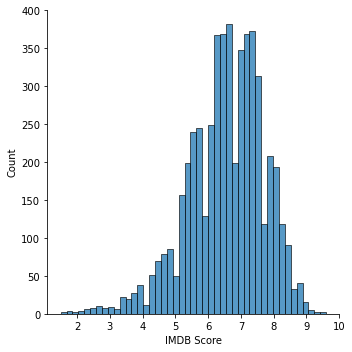

In [34]:
#deviate from the Gaussian/normal distribution.
#negative skewness
#sns.distplot(data["IMDB Score"])
sns.displot(data["IMDB Score"])

In [35]:
#Pearson's first coefficient of skewness = (mean - mode)/standard deviation.
#Pearson's second coefficient of skewness = 3(mean - median)/standard deviation, mean - mode ~ 3(mean - median)
#extremely skewed <=> coef < -1 or coef > 1
#slightly skewed <=> (coef >= -1 and coef <= -0.5) or (coef <= 1 and coef >= 0.5)
#nearly symmetrical <=> coef >= -0.5 and coef <= 0.5
print("Skewness: %f" % data["IMDB Score"].skew())

#Excess kurtosis = Kurtosis - 3, normal distribution kurtosis = 3
#Leptokurtic <=> E_kurt > 0
#Mesokurtic <=> E_kurt ~ 0
#Platykurtic <=> E_kurt < 0
print("Kurtosis: %f" % data["IMDB Score"].kurt())

Skewness: -0.659896
Kurtosis: 0.786183


In [36]:
def op_analyze(_data):
    def check(_coef):
        if _coef > 0:
            return 1
        if _coef < 0:
            return -1
        return 0
    
    def show_skew_types(_sk_coef):
        types = ["Uniform distribution", "right", "left"]
        if abs(_sk_coef) > 1:
            print("Extremely {}-skewed.".format(types[check(_sk_coef)]))
            return
        if abs(_sk_coef) >= 0.5:
            print("Slightly {}-skewed.".format(types[check(_sk_coef)]))
            return
        if _sk_coef > 0:
            print("Nearly symmetrical.")
            return
        print(types[check(_sk_coef)])
        
    def show_kurt_types(_kurt_coef):
        kurt_types = ["Mesokurtic","Leptokurtic", "Platykurtic"]
        print("{} distribution.".format(kurt_types[check(_kurt_coef)]))
        
    skew_coef = _data.skew()
    print("Skewness: %f" % data["IMDB Score"].skew(), end=", ")
    show_skew_types(skew_coef)
    
    kurt_coef = _data.kurt()
    print("Kurtosis: %f" % data["IMDB Score"].kurt(), end=", ")
    show_kurt_types(kurt_coef)
    
    sns.displot(_data)
    
#op_analyze(data["IMDB Score"])

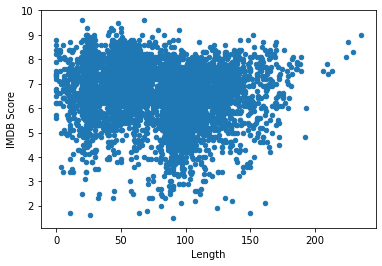

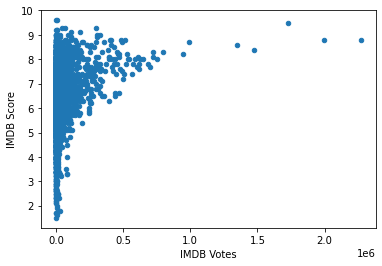

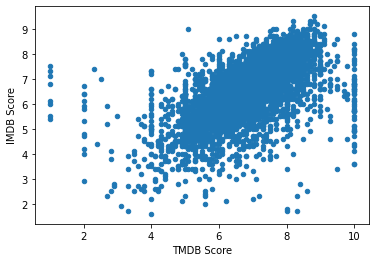

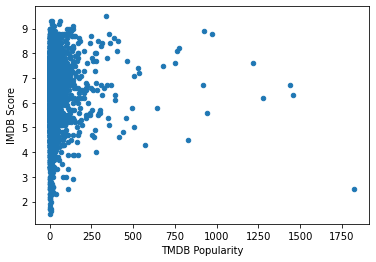

In [56]:
def numerical_relationship_plot(_data, _y, _x_varibles):
    for i in range(0, len(_x_varibles)):
        r_data = pd.concat([_data[_y], _data[_x_varibles[i]]], axis = 1)
        data.plot.scatter(x = _x_varibles[i], y = _y)
        
numerical_x_varibles = ["Length", "IMDB Votes", "TMDB Score", "TMDB Popularity"]
numerical_relationship_plot(data, "IMDB Score", numerical_x_varibles)

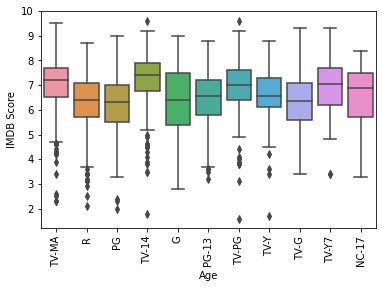

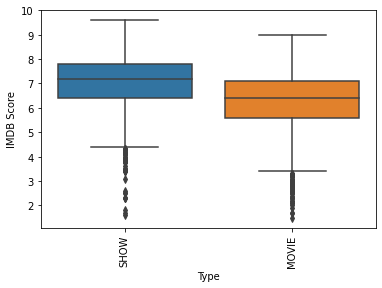

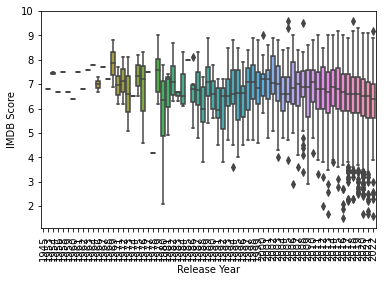

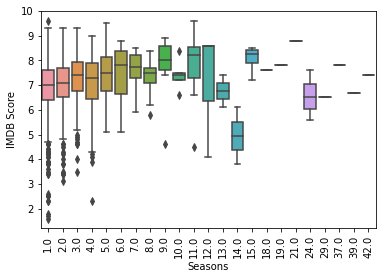

In [57]:
def categorical_relationship_plot(_data, _y, _x_varibles):
    for i in range(0, len(_x_varibles)):
        r_data = pd.concat([_data[_y], _data[_x_varibles[i]]], axis = 1)
        sns.boxplot(x = _x_varibles[i], y = _y, data = r_data)
        plt.xticks(rotation = 90)
        plt.show()
        
categorical_x_varibles = ["Age", "Type", "Release Year", "Seasons"]
categorical_relationship_plot(data, "IMDB Score", categorical_x_varibles)

In [62]:
#correlation
corr_matrix = data.corr()
corr_matrix

,Release Year,Length,Seasons,IMDB Score,IMDB Votes,TMDB Popularity,TMDB Score
Release Year,1.000000,-0.211076,-0.505831,-0.102849,-0.196988,0.025628,0.049107
Length,-0.211076,1.000000,-0.132740,-0.159297,0.138610,-0.027493,-0.285232
Seasons,-0.505831,-0.132740,1.000000,0.097727,0.212645,0.331362,0.026796
IMDB Score,-0.102849,-0.159297,0.097727,1.000000,0.189954,0.023159,0.587675
IMDB Votes,-0.196988,0.138610,0.212645,0.189954,1.000000,0.201813,0.109720
TMDB Popularity,0.025628,-0.027493,0.331362,0.023159,0.201813,1.000000,0.068405
TMDB Score,0.049107,-0.285232,0.026796,0.587675,0.109720,0.068405,1.000000


<AxesSubplot:>

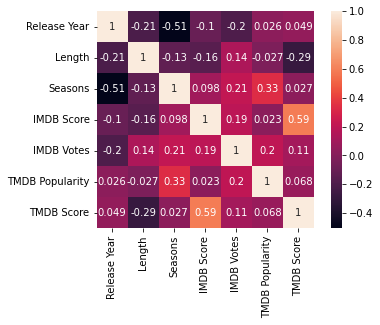

In [69]:
#heat map of correlation
sns.heatmap(corr_matrix, square = True, annot = True)

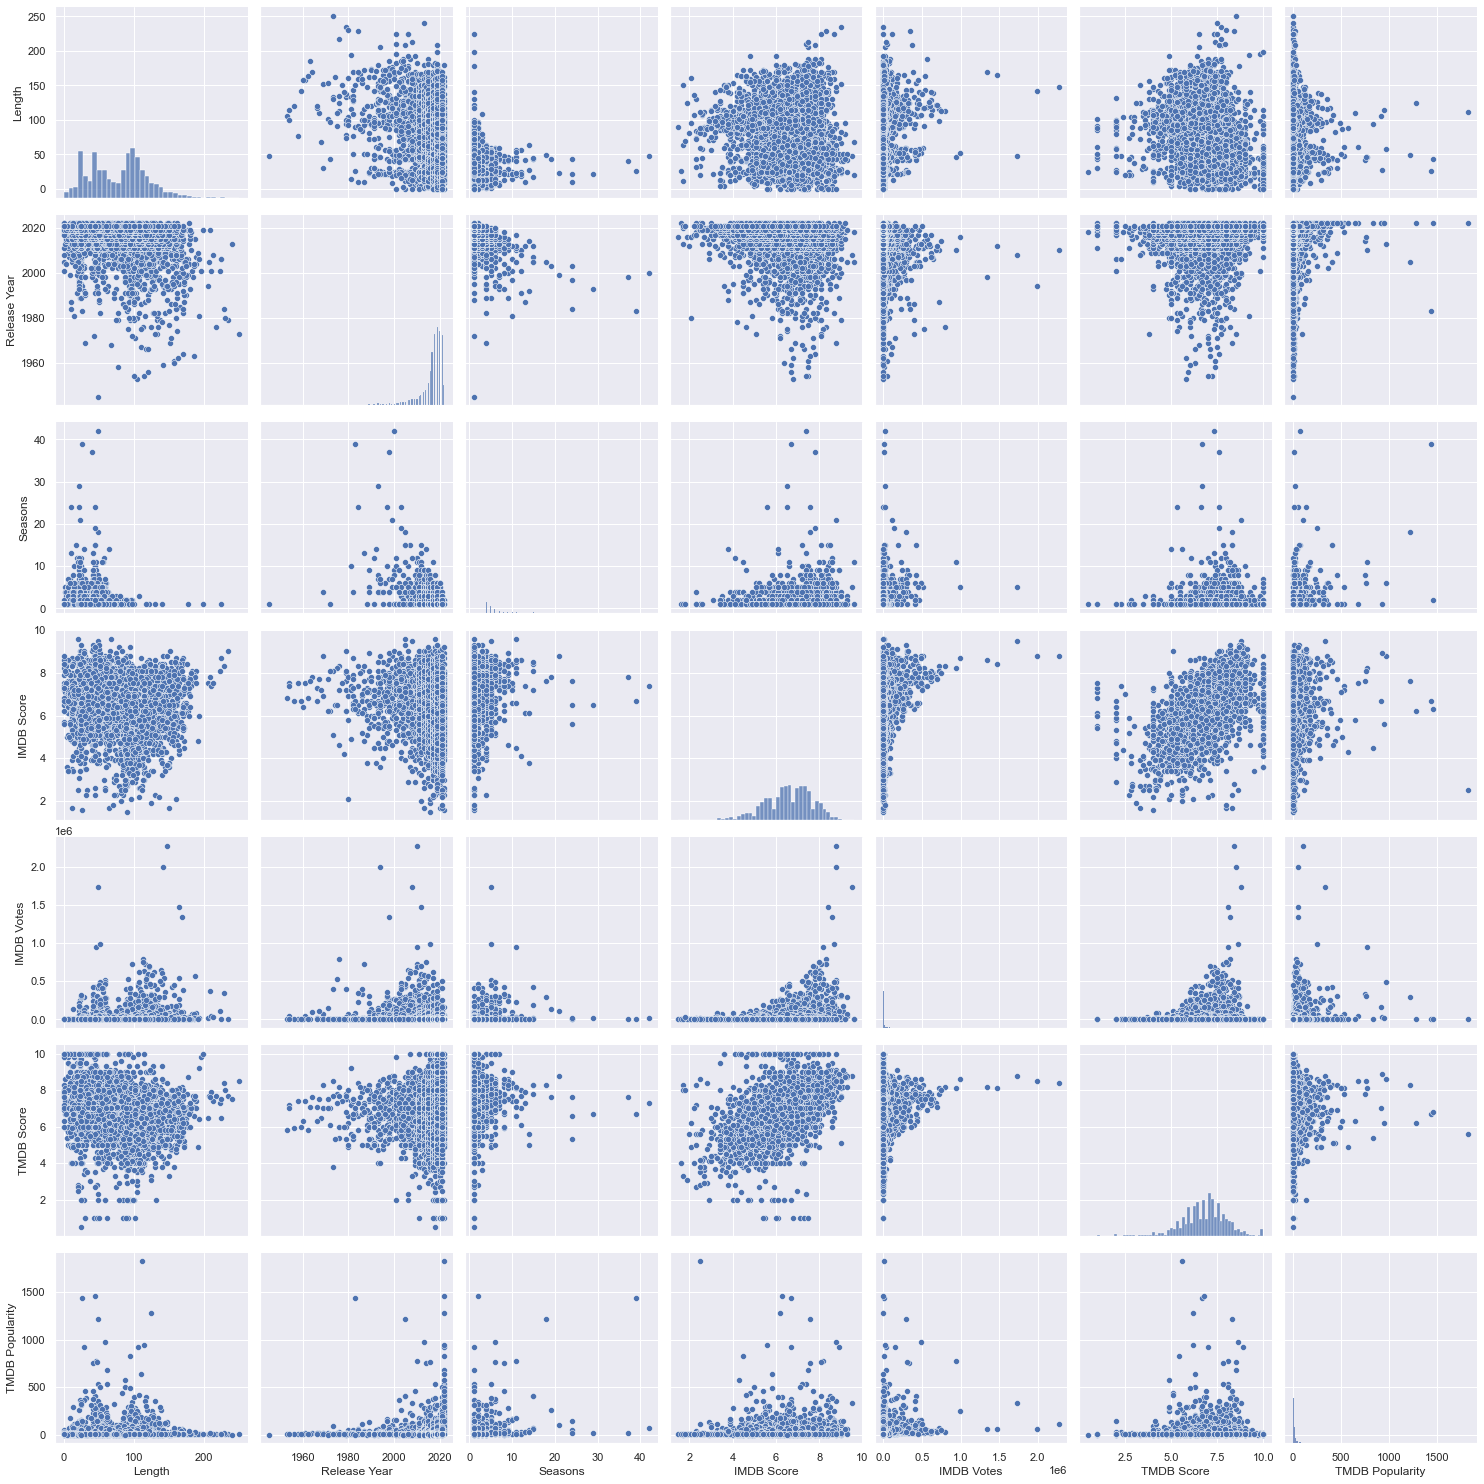

In [74]:
#Scatter plot between "IMBD Score" and correlated varibles
sns.set()
cols = ["Age", "Length", "Release Year", "Seasons", "Type", "IMDB Score", "IMDB Votes", "TMDB Score", "TMDB Popularity"]
sns.pairplot(data[cols], height = 3)
plt.show()

In [75]:
#The same goes for "TMDB Score"
op_describe(data["TMDB Score"])

count    5488.000000
mean        6.818039
std         1.171560
min         0.500000
25%         6.100000
50%         6.900000
75%         7.500000
90%         8.200000
95%         8.500000
99%        10.000000
max        10.000000
Name: TMDB Score, dtype: float64